In [32]:
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

In [87]:
df = pd.read_csv('DPH_Abs_gr1.txt', delimiter='\t', header=None, names=['Wavelength', 'ABS'])

df['Wavelength'] = df['Wavelength'].str.replace(',', '.').astype(float)
df['ABS'] = df['ABS'].str.replace(',', '.').astype(float)

max_abs_value = df['ABS'].max()
max_abs_wavelength = df.loc[df['ABS'] == max_abs_value, 'Wavelength'].iloc[0]
print(f'Maksymalna absorbancja w etanolu: {max_abs_value} przy długości fali: {max_abs_wavelength} nm')




Maksymalna absorbancja w etanolu: 0.232632 przy długości fali: 352.0 nm


In [88]:
df_2 = pd.read_csv('DPH_Em w etanolu slits 1_1.dat', delimiter='\t')
df_2 = df_2.iloc[1:]  # Pominięcie pierwszego wiersza z jednostkami
df_2['Wavelength'] = pd.to_numeric(df_2['Wavelength'])
df_2['S1'] = pd.to_numeric(df_2['S1'])

# Znalezienie maksimum w df_2 (Intensywność)
max_s2_value = df_2['S1'].max()
max_s2_wavelength = df_2.loc[df_2['S1'] == max_s2_value, 'Wavelength'].iloc[0]

print(f'Maksymalna intensywność w wodzie: {max_s2_value} przy długości fali: {max_s2_wavelength} nm')

Maksymalna intensywność w wodzie: 5926400 przy długości fali: 425 nm


In [89]:
df_1 = pd.read_csv('DPH_Exc w etanolu slits 1_1.dat', delimiter='\t')
df_1 = df_1.iloc[1:]  # Pominięcie pierwszego wiersza z jednostkami
df_1['Wavelength'] = pd.to_numeric(df_1['Wavelength'])
df_1['S1'] = pd.to_numeric(df_1['S1'])

# Znalezienie maksimum w df_2 (Intensywność)
max_s1_value = df_1['S1'].max()
max_s1_wavelength = df_1.loc[df_1['S1'] == max_s1_value, 'Wavelength'].iloc[0]

print(f'Maksymalna intensywność w wodzie: {max_s1_value} przy długości fali: {max_s1_wavelength} nm')

Maksymalna intensywność w wodzie: 6644850 przy długości fali: 351 nm


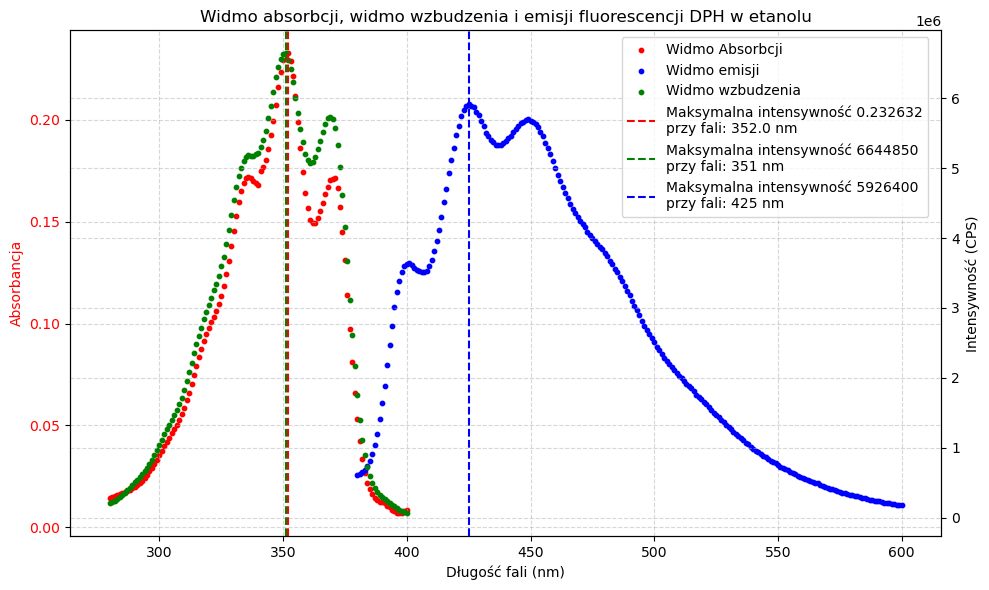

In [105]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.scatter(df['Wavelength'], df['ABS'], color='red', s=10, label='Widmo Absorbcji')
ax1.set_xlabel('Długość fali (nm)')
ax1.set_ylabel('Absorbancja', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  # Tworzy drugą oś Y
ax2.scatter(df_2['Wavelength'], df_2['S1'], color='blue', s=10, label='Widmo emisji')
ax2.scatter(df_1['Wavelength'], df_1['S1'], color='green', s=10, label='Widmo wzbudzenia')
ax2.set_ylabel('Intensywność (CPS)')
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.tick_params(axis='y')

plt.axvline(max_abs_wavelength, color='red', linestyle='--', label=f"Maksymalna intensywność {max_abs_value}\nprzy fali: {max_abs_wavelength} nm")
plt.axvline(max_s1_wavelength, color='green', linestyle='--', label=f"Maksymalna intensywność {max_s1_value}\nprzy fali: {max_s1_wavelength} nm")
plt.axvline(max_s2_wavelength, color='blue', linestyle='--', label=f"Maksymalna intensywność {max_s2_value}\nprzy fali: {max_s2_wavelength} nm")

plt.title('Widmo absorbcji, widmo wzbudzenia i emisji fluorescencji DPH w etanolu')
fig.tight_layout()  # Zapewnia odpowiednie rozmieszczenie elementów
fig.legend(loc='center', bbox_to_anchor=(0.78, 0.78))
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# Zadanie 2

In [37]:
df_2 = pd.read_csv('DPH_Em w etanolu slits 1_1.dat', delimiter='\t')
df_2 = df_2.iloc[1:]  # Pominięcie pierwszego wiersza z jednostkami
df_2['Wavelength'] = pd.to_numeric(df_2['Wavelength'])
df_2['S1'] = pd.to_numeric(df_2['S1'])


In [38]:
df_3 = pd.read_csv('DPH_Em w wodzie slits 1_1.dat', delimiter='\t')
df_3 = df_3.iloc[1:]  # Pominięcie pierwszego wiersza z jednostkami
df_3['Wavelength'] = pd.to_numeric(df_3['Wavelength'])
df_3['S1'] = pd.to_numeric(df_3['S1'])

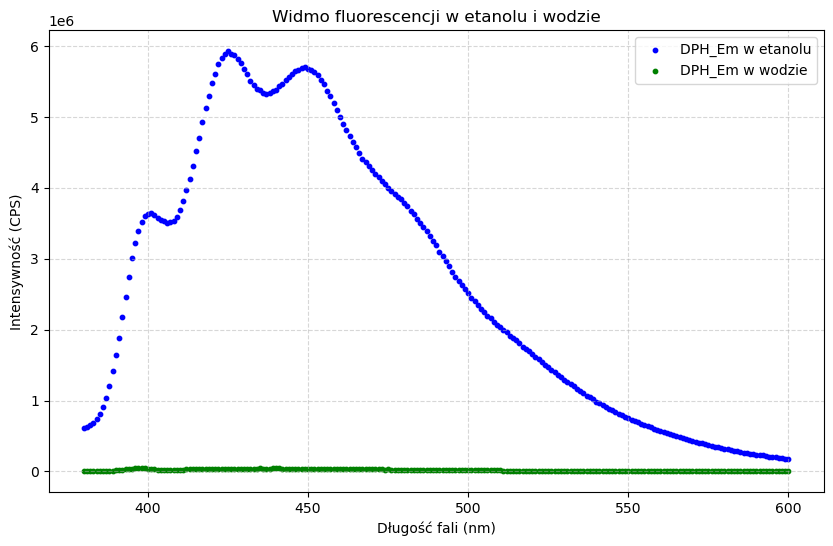

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df_2['Wavelength'], df_2['S1'], color='blue', s=10, label = 'DPH_Em w etanolu')
plt.scatter(df_3['Wavelength'], df_3['S1'], color='green', s=10, label = 'DPH_Em w wodzie')
plt.title('Widmo fluorescencji w etanolu i wodzie')
plt.xlabel('Długość fali (nm)')
plt.ylabel('Intensywność (CPS)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Zadanie 3

In [40]:
df_4 = pd.read_csv('DPH_Anizo_DPPC.txt', delimiter='\t')
df_4 = df_4.iloc[1:]  # Pominięcie pierwszego wiersza z jednostkami
df_4['Temperature'] = pd.to_numeric(df_4['Temperature'])
df_4['Anisotropy'] = pd.to_numeric(df_4['Anisotropy'])

In [41]:
df_5 = pd.read_csv('DPH_Anizo_EYPC.txt', delimiter='\t')
df_5 = df_5.iloc[1:]  # Pominięcie pierwszego wiersza z jednostkami
df_5['Temperature'] = pd.to_numeric(df_5['Temperature'])
df_5['Anisotropy'] = pd.to_numeric(df_5['Anisotropy'])

In [42]:

df_4_clean = pd.read_csv('DPH_Anizo_DPPC.txt', delimiter='\t')
df_4_clean['Temperature'] = pd.to_numeric(df_4_clean['Temperature'], errors='coerce')
df_4_clean['Anisotropy'] = pd.to_numeric(df_4_clean['Anisotropy'], errors='coerce')
df_4_clean.dropna()

,Temperature,Anisotropy,Unnamed: 2,Unnamed: 3,Unnamed: 4


In [43]:
df_5_clean = pd.read_csv('DPH_Anizo_EYPC.txt', delimiter='\t')
df_5_clean['Temperature'] = pd.to_numeric(df_5_clean['Temperature'], errors='coerce')
df_5_clean['Anisotropy'] = pd.to_numeric(df_5_clean['Anisotropy'], errors='coerce')
df_5_clean.dropna()

,Temperature,Anisotropy,Unnamed: 2


In [44]:
def sigmoid(T, A1, A2, Tm, k):
    return A1 + (A2 - A1) / (1 + np.exp((Tm - T) / k))

In [45]:
popt_4, _ = curve_fit(sigmoid, df_4_clean['Temperature'], df_4_clean['Anisotropy'], 
                        p0=[min(df_4_clean['Anisotropy']), max(df_4_clean['Anisotropy']), 25, 1])
A1_4, A2_4, Tm_4, k_4 = popt_4
print(f"Temperatura przejścia fazowego: {Tm_4:.2f}°C")

Temperatura przejścia fazowego: 41.38°C


In [46]:
popt_5, _ = curve_fit(sigmoid, df_5_clean['Temperature'], df_5_clean['Anisotropy'], 
                        p0=[min(df_5_clean['Anisotropy']), max(df_5_clean['Anisotropy']), 25, 1])
A1_5, A2_5, Tm_5, k_5 = popt_5
print(f"Temperatura przejścia fazowego: {Tm_5:.2f}°C")

Temperatura przejścia fazowego: 45.87°C


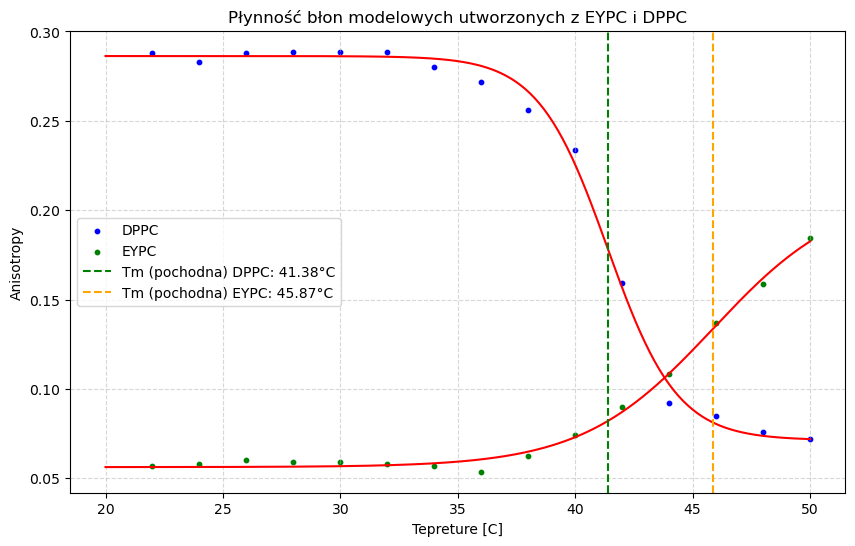

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df_4['Temperature'], df_4['Anisotropy'], color='blue', s=10, label = 'DPPC')
plt.scatter(df_5['Temperature'], df_5['Anisotropy'], color='green', s=10, label = 'EYPC')

T_range_4 = np.linspace(df_4_clean['Temperature'].min(), df_4_clean['Temperature'].max(), 300)
plt.plot(T_range_4, sigmoid(T_range_4, *popt_4), color='red')
T_range_5 = np.linspace(df_5_clean['Temperature'].min(), df_5_clean['Temperature'].max(), 300)
plt.plot(T_range_5, sigmoid(T_range_5, *popt_5), color='red')

plt.axvline(Tm_4, color='green', linestyle='--', label=f'Tm (pochodna) DPPC: {Tm_4:.2f}°C')
plt.axvline(Tm_5, color='orange', linestyle='--', label=f'Tm (pochodna) EYPC: {Tm_5:.2f}°C')

plt.title('Płynność błon modelowych utworzonych z EYPC i DPPC')
plt.xlabel('Tepreture [C]')
plt.ylabel('Anisotropy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()